## HW3

(a) Download the Communities and Crime data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as
the training set and the rest as the test set.

In [161]:
import pandas as pd

fileData = pd.read_csv("communities.csv",header=None)
column_list = list(pd.read_csv("colnames.csv",header=None)[0])
fileData.columns = column_list
print(fileData)

      state county community           communityname  fold  population  \
0         8      ?         ?            Lakewoodcity     1        0.19   
1        53      ?         ?             Tukwilacity     1        0.00   
2        24      ?         ?            Aberdeentown     1        0.00   
3        34      5     81440     Willingborotownship     1        0.04   
4        42     95      6096       Bethlehemtownship     1        0.01   
5         6      ?         ?       SouthPasadenacity     1        0.02   
6        44      7     41500             Lincolntown     1        0.01   
7         6      ?         ?               Selmacity     1        0.01   
8        21      ?         ?           Hendersoncity     1        0.03   
9        29      ?         ?             Claytoncity     1        0.01   
10        6      ?         ?            DalyCitycity     1        0.13   
11       36      ?         ?  RockvilleCentrevillage     1        0.02   
12       25     21     44105          

(b) The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set.

There are various data imputation techniques like dropping missing rows, replacing by zero , replacing with mean of columns.
Here I have replaced the missing values with the corresponding mean of the column. 

In [162]:
import numpy
from sklearn.preprocessing import Imputer
fileData = fileData.drop(["communityname","state","county","community","fold"],axis=1)
fileData = fileData.replace('?',numpy.NaN)
imputer=Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer = imputer.fit(fileData)
fileData=imputer.transform(fileData)
column_list.remove("communityname")
column_list.remove("state")
column_list.remove("county")
column_list.remove("community")
column_list.remove("fold")
finalData = pd.DataFrame(fileData,
                      columns=column_list)
print(finalData)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
5           0.02           0.28          0.06          0.54          1.00   
6           0.01           0.39          0.00          0.98          0.06   
7           0.01           0.74          0.03          0.46          0.20   
8           0.03           0.34          0.20          0.84          0.02   
9           0.01           0.40          0.06          0.87          0.30   
10          0.13           0.71          0.15          0.07          1.00   
11          0.02           0.46          0.08          0.91          0.07   

In [163]:
trainData = finalData[:1495]
testData = finalData[1495:]
print(trainData)
print(testData)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
5           0.02           0.28          0.06          0.54          1.00   
6           0.01           0.39          0.00          0.98          0.06   
7           0.01           0.74          0.03          0.46          0.20   
8           0.03           0.34          0.20          0.84          0.02   
9           0.01           0.40          0.06          0.87          0.30   
10          0.13           0.71          0.15          0.07          1.00   
11          0.02           0.46          0.08          0.91          0.07   

(c) Plot a correlation matrix for the features in the data set.

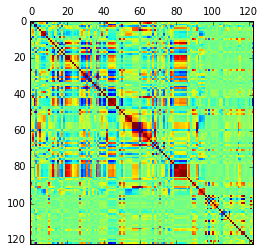

In [164]:
import matplotlib.pyplot as plt
corr = trainData.corr()
plt.matshow(trainData.corr())
plt.show()

In [165]:
print(corr)

                      population  householdsize  racepctblack  racePctWhite  \
population              1.000000      -0.040404      0.242144     -0.306023   
householdsize          -0.040404       1.000000     -0.068374     -0.243565   
racepctblack            0.242144      -0.068374      1.000000     -0.793431   
racePctWhite           -0.306023      -0.243565     -0.793431      1.000000   
racePctAsian            0.168868       0.209848     -0.104912     -0.270829   
racePctHisp             0.162282       0.473320     -0.069449     -0.436737   
agePct12t21             0.014554       0.517742      0.118272     -0.189135   
agePct12t29             0.128721       0.371658      0.143406     -0.258390   
agePct16t24             0.075744       0.301949      0.125330     -0.175195   
agePct65up             -0.107060      -0.606714      0.056381      0.138619   
numbUrban               0.993613      -0.041553      0.234451     -0.301945   
pctUrban                0.239205      -0.021469     

(d) Calculate the Coefficient of Variation for each feature.

In [166]:
CV = (trainData.iloc[:,:-2].std()/trainData.iloc[:,:-2].mean()*100).sort_values()
print(CV)

LemasSwFTFieldOps         6.400226
LemasPctPolicOnPatr      11.798845
PctPolicWhite            12.258237
RacialMatchCommPol       13.373712
NumKindsDrugsSeiz        14.353284
PolicReqPerOffic         22.635932
LemasSwFTFieldPerPop     24.500190
PctHousOccup             26.818150
PolicPerPop              28.839909
LemasSwFTPerPop          28.843328
PctSpeakEnglOnly         28.999867
agePct12t29              29.131481
PctSameState85           29.843407
PolicAveOTWorked         30.888779
LemasTotReqPerPop        30.942253
PersPerFam               31.737540
PctSameCity85            31.875805
PersPerOwnOccHous        31.921445
PctTeen2Par              32.780083
pctWWage                 32.861406
racePctWhite             33.021266
PctFam2Par               33.319466
PctYoungKids2Par         33.383347
PctSameHouse85           33.451878
PctKids2Par              33.487557
PctWorkMom               33.601789
PctHousOwnOcc            33.612859
PctBornSameState         33.624489
PctWorkMomYoungKids 

(e) Pick b√128c features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
significance of those features, just by the scatter plots?

In [167]:
sortedList = CV.iloc[len(CV)-11:len(CV)].keys()
print(sortedList)

Index(['racePctHisp', 'LandArea', 'HousVacant', 'numbUrban', 'population',
       'NumUnderPov', 'LemasPctOfficDrugUn', 'NumImmig', 'NumIlleg',
       'NumInShelters', 'NumStreet'],
      dtype='object')


The above listed are the 11 features with highest CV value.

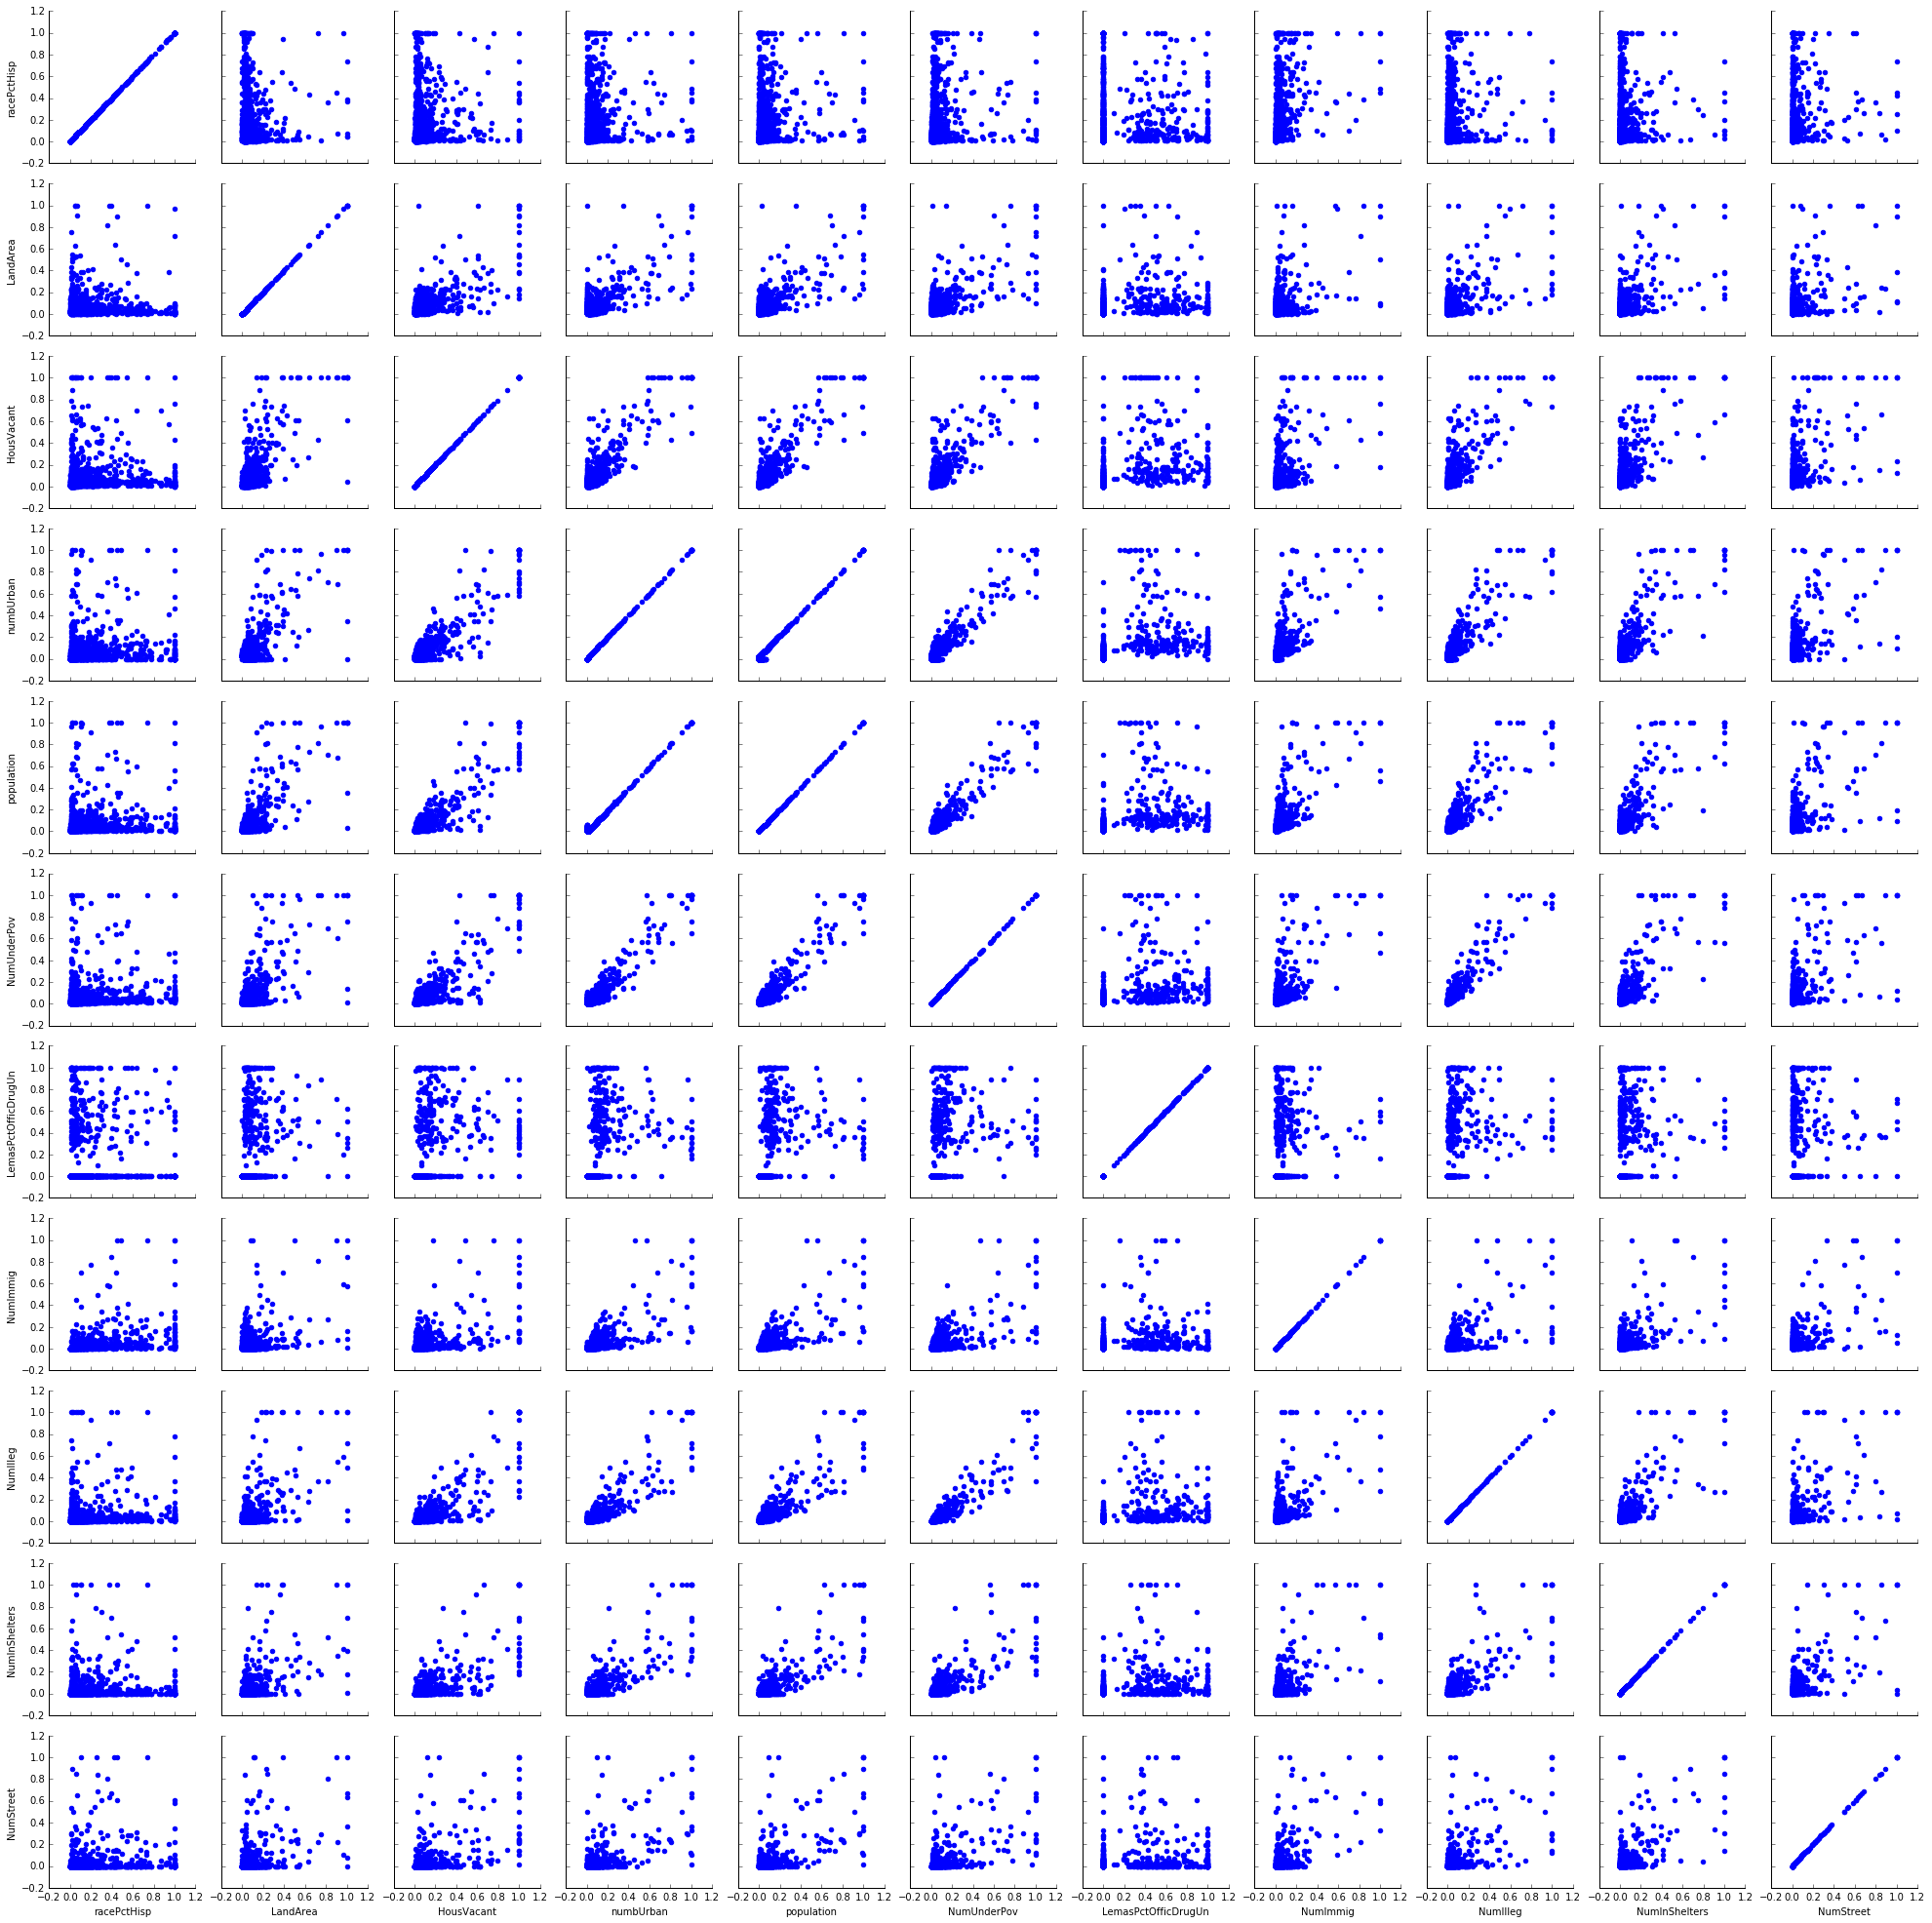

In [168]:
import seaborn as sns
g = sns.PairGrid(trainData[sortedList])
g = g.map(plt.scatter)
plt.show()

We can draw information on the level of correlation between these predictors.
Features like NumShelters and Numilleg seem to show good correlation. Similarly population and house vacant. Numurban and numillegal. These correlations may pose problems of multicollinearity and hence it is important to use dimensionality reduction methods.

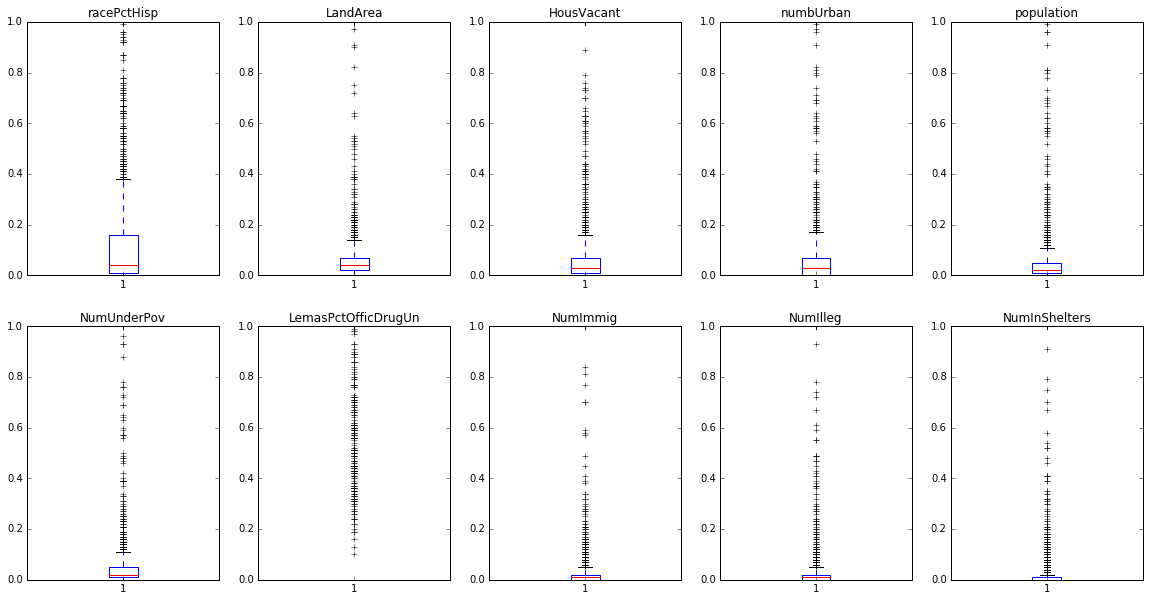

In [180]:
fig,ax = plt.subplots(nrows = 2,ncols = 5,figsize=(20,10))
j = 0
for row in ax:
    for col in row:
        col.boxplot(trainData[sortedList[j]].values)
        col.set_title(sortedList[j])
        j+=1
plt.show()

(f) Fit a linear model using least squares to the training set and report the test error.

In [170]:
trainLabels = trainData["ViolentCrimesPerPop"]
trainFeatures = trainData.drop(["ViolentCrimesPerPop"],axis=1)
testLabels = testData["ViolentCrimesPerPop"]
testFeatures = testData.drop(["ViolentCrimesPerPop"],axis=1)

from sklearn import linear_model
regressor = linear_model.LinearRegression().fit(trainFeatures,trainLabels)
result = pd.DataFrame()
result["predicted"] = regressor.predict(testFeatures)
testLabels.index=result.index
result["actual"] = testLabels

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(result["actual"], result["predicted"])
print(mse)

0.7897255274575948


Linear Regression has a MSE of 0.789 on the full feature space on the test data.

(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation.
Report the test error obtained.

In [171]:
regressor = linear_model.RidgeCV().fit(trainFeatures,trainLabels)
result = pd.DataFrame()
result["predicted"] = regressor.predict(testFeatures)
testLabels.index=result.index
result["actual"] = testLabels
mse = mean_squared_error(result["actual"], result["predicted"])
print(mse)

0.0177370811043041


Ridge Regression has a MSE of 0.0177 on the test Data. Hence regualrization has been vital in reducing the variance of the model to improve the test mse.

(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with normalized features. Report the test error for both cases and compare
them.

In [172]:
regressor = linear_model.LassoCV().fit(trainFeatures,trainLabels)
result = pd.DataFrame()
result["predicted"] = regressor.predict(testFeatures)
testLabels.index=result.index
result["actual"] = testLabels
mse = mean_squared_error(result["actual"], result["predicted"])
print(mse)

0.017571494438336065


/Users/ashvant/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [173]:
regressor = linear_model.LassoCV(normalize=True,max_iter=3000).fit(trainFeatures,trainLabels)
result = pd.DataFrame()
result["predicted"] = regressor.predict(testFeatures)
testLabels.index=result.index
result["actual"] = testLabels
mse = mean_squared_error(result["actual"], result["predicted"])
print(trainFeatures.columns[regressor.coef_ != 0])
print(mse)

Index(['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban', 'pctWInvInc',
       'pctWPubAsst', 'pctWRetire', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'MalePctDivorce', 'PctKids2Par', 'PctYoungKids2Par',
       'PctWorkMom', 'PctIlleg', 'PctPersDenseHous', 'PctHousLess3BR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet',
       'PctForeignBorn', 'PctSameCity85', 'LemasSwFTFieldPerPop',
       'LemasTotReqPerPop', 'PolicReqPerOffic', 'OfficAssgnDrugUnits',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop'],
      dtype='object')
0.017509630716696294


Lasso effectively zeroes out less significant features and hence provides a better test error. Since all the features are already between 0 and 1 there is not much of a change in mse when normalized and listed above are the features selected by lasso. The mse without normalization is 0.01757 and with normalization is 0.01750

(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [183]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
bestCrossValError = 1000
for ncomponents in range(1,100):
    kf = KFold(n_splits=5)
    sumOfError=0
    result_pls = pd.DataFrame()
    for train, test in kf.split(trainFeatures,trainLabels):
        trainFeaturesSplit = trainFeatures.iloc[train]
        trainLabelsSplit = trainLabels.iloc[train]
        testFeaturesSplit = trainFeatures.iloc[test]
        testLabelsSplit = trainLabels.iloc[test]
        pls2 = PLSRegression(n_components=ncomponents)
        pls2.fit(trainFeaturesSplit,trainLabelsSplit)
        result_pls =  pd.DataFrame(pls2.predict(testFeaturesSplit))
        result_pls["predicted"] = result_pls.iloc[:,0]
        testLabelsSplit.index=result_pls.index
        result_pls["actual"] = testLabelsSplit
        sumOfError+= mean_squared_error(result_pls["actual"], result_pls["predicted"])
    crossValError = sumOfError/5
    if(crossValError<bestCrossValError):
        bestCrossValError = crossValError
        bestComponent = ncomponents

In [182]:
print("Best Cross validation error(MSE) = ",bestCrossValError)
print("Cross validated number of principal components = ",bestComponent)
result_pls = pd.DataFrame()
pls2 = PLSRegression(n_components=bestComponent)
pls2.fit(trainFeatures,trainLabels)
result_pls =  pd.DataFrame(pls2.predict(testFeatures))
result_pls["predicted"] = result_pls.iloc[:,0]
testLabels.index=result_pls.index
result_pls["actual"] = testLabels
mse = mean_squared_error(result_pls["actual"], result_pls["predicted"])
print("Error on test data (MSE) =  ",mse)

Best Cross validation error(MSE) =  0.01961699593659548
Cross validated number of principal components =  11
Error on test data (MSE) =   0.01851491237649848


The highest variance explained and lowest cross validated MSE is possible when we use 11 principal components.

(j) In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use L1-penalized regression at each node. Such a tree is called L1 penalized
gradient boosting tree. You can use XGBoost to fit the model tree. Determine α
(the regularization term) using cross-validation.

In [146]:
import xgboost as xgb

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
import numpy as np
params = {"reg_alpha":np.linspace(10**-5,1, num=10)}
print(params)

{'reg_alpha': array([1.0000e-05, 1.1112e-01, 2.2223e-01, 3.3334e-01, 4.4445e-01,
       5.5556e-01, 6.6667e-01, 7.7778e-01, 8.8889e-01, 1.0000e+00])}


In [149]:
xgbr = xgb.XGBRegressor()
clf = GridSearchCV(estimator=xgbr,param_grid = params,cv=10)

In [150]:
print(clf)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reg_alpha': array([1.0000e-05, 1.1112e-01, 2.2223e-01, 3.3334e-01, 4.4445e-01,
       5.5556e-01, 6.6667e-01, 7.7778e-01, 8.8889e-01, 1.0000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [151]:
clf.fit(trainFeatures, trainLabels)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reg_alpha': array([1.0000e-05, 1.1112e-01, 2.2223e-01, 3.3334e-01, 4.4445e-01,
       5.5556e-01, 6.6667e-01, 7.7778e-01, 8.8889e-01, 1.0000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [152]:
print(clf.best_estimator_)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0.5555599999999999, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [153]:
print(clf.best_params_)

{'reg_alpha': 0.5555599999999999}


The optimal alpha value on XGBoost is is 0.555 determined by 10-fold cross validation.